# 라이브러리 로드 및 기본 세팅

In [1]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.5 MB/s 


In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.4 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 167 kB 43.6 MB/s 
     |████████████████████████████████| 113 kB 43.7 MB/s 
     |████████████████████████████████| 2.0 MB 30.0 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 15.5 MB 37.9 MB/s 
     |████████████████████████████████| 261 kB 41.9 MB/s 
     |████████████████████████████████| 1.3 MB 38.1 MB/s 
     |████████████████████████████████| 6.8 MB 44.9 MB/s 
     |████████████████████████████████| 1.7 MB 41.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 596 kB 43.6 MB/s 
     |████████████████████████████████| 10.9 MB 37.6 MB/s 
     |████████████████████████████████| 675 kB 42.7 MB/s 
     |████████████████

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm
from pycaret.utils import check_metric

# 데이콘 점수

In [5]:
# 자체 점수 : 0.718
# 제출 점수(제출 날짜) : 0.684809058(2022-01-04 12:27:25)

# 설정

In [6]:
# pycaret : blend(cat, tuned_lgbm)
# probability_threshold : 단계별 적용
# comb
# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [7]:
# 제거된 특성(6개)
# 'id',
# 'contents_open_dt',
# 'person_rn',
# 'contents_rn',
# 'person_prefer_f',
# 'person_prefer_g'

In [8]:
# 매칭 속성

In [9]:
# d_l_match_yn : 'person_prefer_d_1_l', 'contents_attribute_d_l' 매칭 여부
# d_m_match_yn : 'person_prefer_d_1_n', 'contents_attribute_d_n' 매칭 여부'
# d_s_match_yn : 'person_prefer_d_1', 'contents_attribute_d' 매칭 여부
# h_l_match_yn : 'person_prefer_h_1_l', 'contents_attribute_h_l' 매칭 여부
# h_m_match_yn : 'person_prefer_h_1_m', 'contents_attribute_h_m' 매칭 여부
# h_s_match_yn : 'person_prefer_h_1', 'contents_attribute_h' 매칭 여부

# 데이터 불러오기

In [10]:
# train = pd.read_csv('../data/df_train.csv')
# test = pd.read_csv('../data/df_test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [12]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [14]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

## 훈련에 의미가 적은 열 제거

In [15]:
# 제거된 특성(6개)
# 'id',
# 'contents_open_dt',
# 'contents_rn',
# 'person_rn',
# 'person_prefer_f',
# 'person_prefer_g',

In [16]:
# 삭제할 특성
pop_col = ['id',
'contents_open_dt',
'contents_rn',
'person_rn',
'person_prefer_f',
'person_prefer_g'
]
len(pop_col)

6

In [17]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 57 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_h_1       46404 non-null  int64
 15  person_prefer_h_2  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [20]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train = train.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [21]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test = test.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


## 카테고리형 특성으로 지정할 특성

In [22]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [23]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [24]:
cat_cols = ['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
len(cat_cols)

4

## bin_numeric_features

In [25]:
# bin_numeric_features : ❌
  # 미리 정의된 bin을 사용하여 연속된 값을 범주형 값으로 변환하는 방법
  # 연속된 값의 고유값이 너무 많거나 예상 범위를 벗어난 극단값이 거의 없는 경우에 효과적

In [26]:
# 고유값 개수가 100개 이상인 특성
# person_prefer_d_1 : 1093
# person_prefer_d_2 : 1081
# person_prefer_d_3 : 1043
# person_prefer_h_1 : 279
# person_prefer_h_2 : 279
# person_prefer_h_3 : 279
# contents_attribute_l : 1752
# contents_attribute_d : 1065
# contents_attribute_h : 250
# person_prefer_d_1_n : 433
# person_prefer_d_1_s : 137
# person_prefer_d_2_n : 435
# person_prefer_d_2_s : 137
# person_prefer_d_3_n : 420
# person_prefer_d_3_s : 136
# contents_attribute_d_n : 431
# contents_attribute_d_s : 137
# person_prefer_h_1_m : 246
# person_prefer_h_2_m : 246
# person_prefer_h_3_m : 246
# contents_attribute_h_m : 228
# contents_attribute_l_n : 736
# contents_attribute_l_s : 305

In [27]:
# bin_numeric_features 적용할 특성
# 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 
# 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
# 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'
# 'person_prefer_d_1_n', 'person_prefer_d_1_s', 
# 'person_prefer_d_2_n', 'person_prefer_d_2_s',
# 'person_prefer_d_3_n', 'person_prefer_d_3_s',
# 'contents_attribute_d_n', 'contents_attribute_d_s',
# 'person_prefer_h_1_m', 'person_prefer_h_2_m', 'person_prefer_h_3_m',
# 'contents_attribute_h_m', 'contents_attribute_l_n', 'contents_attribute_l_s'

In [28]:
# bin_cols = ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 
#             'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
#             'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h',
#             'person_prefer_d_1_n', 'person_prefer_d_1_s', 
#             'person_prefer_d_2_n', 'person_prefer_d_2_s',
#             'person_prefer_d_3_n', 'person_prefer_d_3_s',
#             'contents_attribute_d_n', 'contents_attribute_d_s', 
#             'person_prefer_h_1_m', 'person_prefer_h_2_m', 'person_prefer_h_3_m',
#             'contents_attribute_h_m', 'contents_attribute_l_n', 'contents_attribute_l_s']

# 모델 훈련/예측

In [29]:
ex = setup(train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, use_gpu=True,
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)

In [30]:
compare_models(sort='F1', exclude=['dummy', 'svm', 'knn', 'gbc', 'ada', 'rf', 'lda', 'et'])
# 8m 18s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6104,0.6565,0.6637,0.5995,0.6300,0.2209,0.2222,7.068
catboost,CatBoost Classifier,0.6115,0.6574,0.6575,0.6018,0.6284,0.2230,0.2240,17.764
nb,Naive Bayes,0.5477,0.5800,0.7048,0.5361,0.6089,0.0957,0.1008,1.186
ridge,Ridge Classifier,0.5917,0.0000,0.6247,0.5857,0.6045,0.1833,0.1838,1.092
lr,Logistic Regression,0.5891,0.6249,0.6053,0.5860,0.5955,0.1783,0.1784,141.004
dt,Decision Tree Classifier,0.5480,0.5481,0.5488,0.5476,0.5482,0.0960,0.0960,10.418
qda,Quadratic Discriminant Analysis,0.5036,0.5035,0.4266,0.5045,0.4481,0.0070,0.0076,11.232


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
model1 = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6119,0.6572,0.6586,0.6020,0.6290,0.2238,0.2248
1,0.6093,0.6547,0.6542,0.6000,0.6259,0.2186,0.2195
2,0.6129,0.6602,0.6570,0.6034,0.6291,0.2258,0.2267
3,0.6132,0.6589,0.6591,0.6033,0.6300,0.2264,0.2273
4,0.6105,0.6560,0.6581,0.6006,0.6280,0.2210,0.2220
Mean,0.6115,0.6574,0.6574,0.6019,0.6284,0.2231,0.2241
SD,0.0015,0.0020,0.0017,0.0014,0.0014,0.0029,0.0029


In [32]:
model2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6101,0.6555,0.6637,0.5992,0.6298,0.2203,0.2216
1,0.6089,0.6554,0.6636,0.5979,0.6290,0.2179,0.2193
2,0.6120,0.6594,0.6644,0.6010,0.6311,0.2240,0.2252
3,0.6108,0.6570,0.6623,0.6002,0.6297,0.2217,0.2229
4,0.6102,0.6551,0.6646,0.5991,0.6301,0.2204,0.2218
Mean,0.6104,0.6565,0.6637,0.5995,0.6300,0.2209,0.2222
SD,0.0010,0.0016,0.0008,0.0011,0.0007,0.0020,0.0019


In [34]:
tuned_model2 = tune_model(model2, optimize='F1')
# 10m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6182,0.6662,0.6536,0.6101,0.6311,0.2364,0.2370
1,0.6197,0.6683,0.6563,0.6113,0.6330,0.2395,0.2402
2,0.6211,0.6705,0.6591,0.6122,0.6348,0.2422,0.2429
3,0.6215,0.6685,0.6542,0.6137,0.6333,0.2430,0.2436
4,0.6213,0.6669,0.6582,0.6127,0.6346,0.2427,0.2433
Mean,0.6204,0.6681,0.6563,0.6120,0.6334,0.2408,0.2414
SD,0.0013,0.0015,0.0021,0.0012,0.0013,0.0025,0.0025


In [35]:
blended_model = blend_models([model1, tuned_model2], optimize='F1', method='soft')
# 4m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6222,0.6703,0.6668,0.6119,0.6382,0.2445,0.2455
1,0.6221,0.6708,0.6659,0.6119,0.6378,0.2442,0.2451
2,0.6236,0.6741,0.6673,0.6134,0.6392,0.2472,0.2482
3,0.6230,0.6723,0.6646,0.6133,0.6379,0.2461,0.2470
4,0.6220,0.6700,0.6677,0.6115,0.6384,0.2441,0.2451
Mean,0.6226,0.6715,0.6665,0.6124,0.6383,0.2452,0.2462
SD,0.0006,0.0015,0.0011,0.0008,0.0005,0.0012,0.0012


## train 예측, F1 자체평가

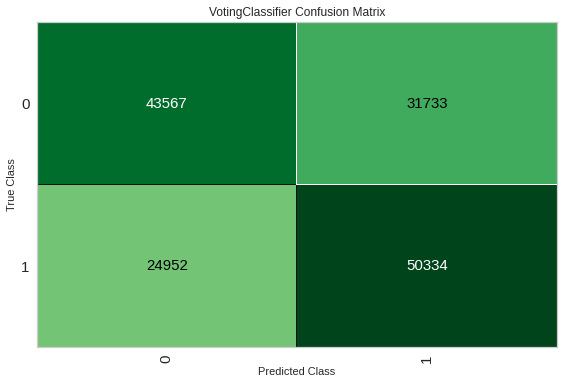

In [36]:
plot_model(blended_model, plot='confusion_matrix')

In [37]:
optimize_threshold(blended_model, false_negative=-1500, false_positive=-900)
# 1m

0.3826

Optimized Probability Threshold: 0.3826 | Optimized Cost Function: -59352300


In [38]:
th = 0.3826
tmp_train_pred = predict_model(blended_model, train, probability_threshold=th)
check_metric(train['target'], tmp_train_pred['Label'], metric = 'F1')
# fn, fp = -1500, -900 / threshold, f1 score = 0.3826, 0.718
# 1m

0.718

## test 예측

In [39]:
pred = predict_model(blended_model, test, probability_threshold=th)

In [40]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.5246
1,1,0.4019
2,1,0.4373
3,1,0.5709
4,1,0.4367


In [41]:
pred['Label']

0        1
1        1
2        1
3        1
4        1
        ..
46399    1
46400    1
46401    1
46402    1
46403    1
Name: Label, Length: 46404, dtype: int64

In [42]:
pred['Label'].value_counts()

1    37087
0     9317
Name: Label, dtype: int64

# 제출파일 불러오기

In [43]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [44]:
sub.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# 제출파일 생성

In [45]:
sub['target'] = pred['Label']
# sub.to_csv('sub_ver3.9.csv', index=False)
sub.to_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver3.9.csv', index=False)

In [46]:
sub.head()

,id,target
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


# 코드 마지막